In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Iris.csv")
print(df.columns)
print(df.shape)
print(df.info())
print(df.isnull().sum())

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [3]:
# Datamız çok temiz ve eksik verimiz yok.
# Sadece index kolonumuz tekrar ediyor ve output kolonumuz kategorik bir değer.
# Yapmamız gereken şey bunları düzenlemek ve daha sonra datayı anlamak için görselleştirmeler yapmak.

In [4]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

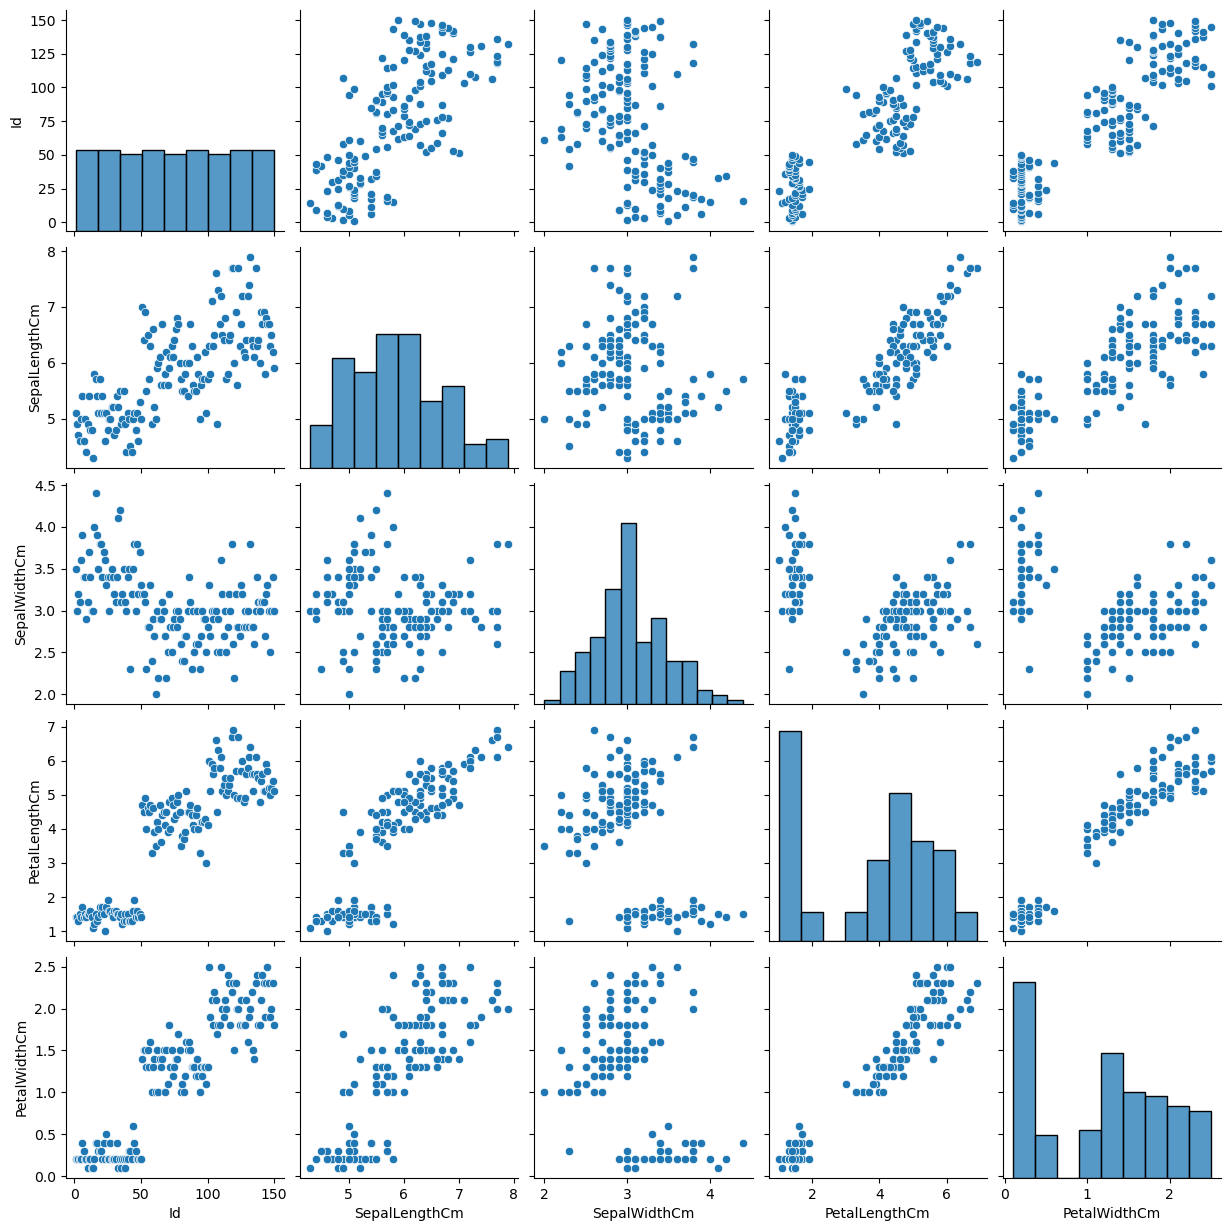

In [5]:
sns.pairplot(df)
plt.show()

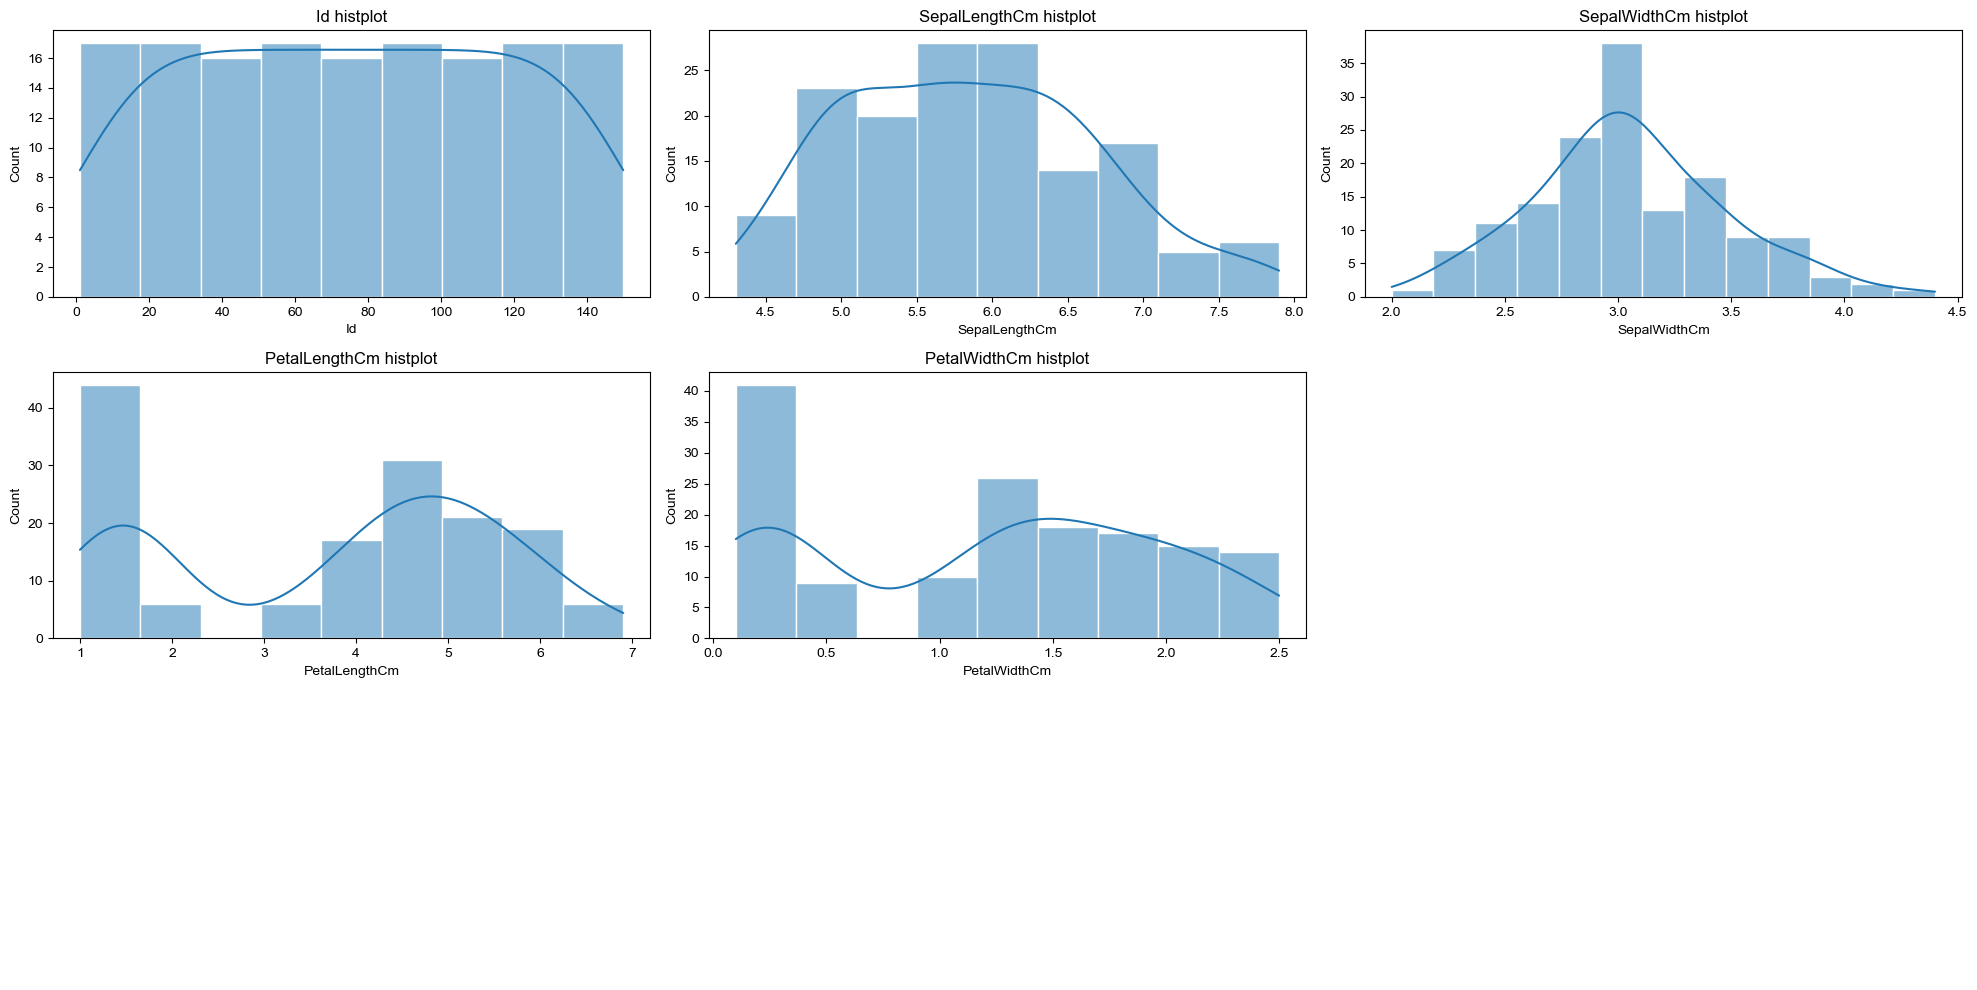

In [6]:
columns = [i for i in df.columns if df[i].dtype != "O"]
fig, ax = plt.subplots(3,3,figsize=(20,10))
ax = ax.flatten()

for i, col in enumerate(columns):
    sns.set_style("whitegrid")
    sns.histplot(
        x=col,
        data=df,
        kde=True,
        ax = ax[i]
    )
    ax[i].set_title(f"{col} histplot")

for i in range(i+1, len(ax)):
    ax[i].axis("off")

plt.tight_layout()
plt.show()

In [7]:
# Dağılımlarımız bu şekilde ve bazı kolonların yüksek korelasyonları var. 
# Şimdi korelasyonları inceleyeceğiz.

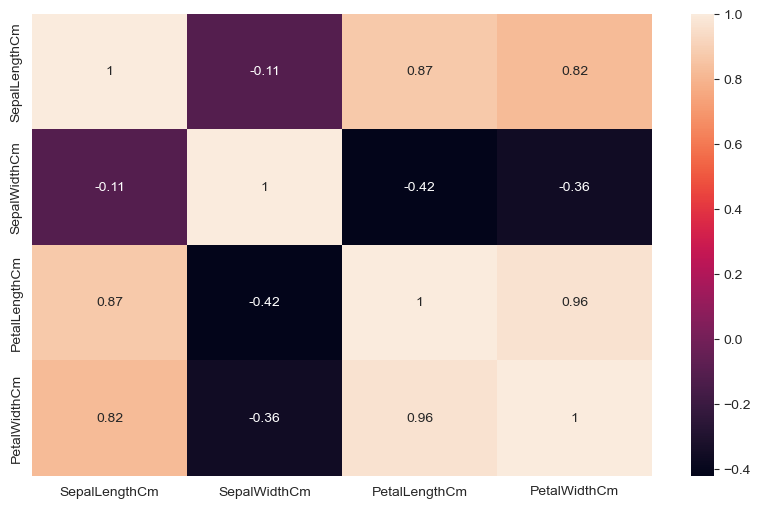

In [8]:
plt.figure(figsize=(10,6))
corr = df.drop(["Id", "Species"], axis=1).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [9]:
# Bazı kolonların çok yüksek korelasyonları var. Bu korelasyonlar Linear ve LogisticRegression'da olduğu gibi burada da sorun yaratır.
# Çünkü Naive Bayes algoritması özelliklerin birbirinden bağımsız olduğunu varsayar.
# kolonlar arası bu denli yüksek ilişkiler olması bu durum için uygun değildir.
# Ama datasetimiz çok temiz ve nereden ayrılacağı çok belli olduğu için bunlar bize sıkıntı çıkarmaz.

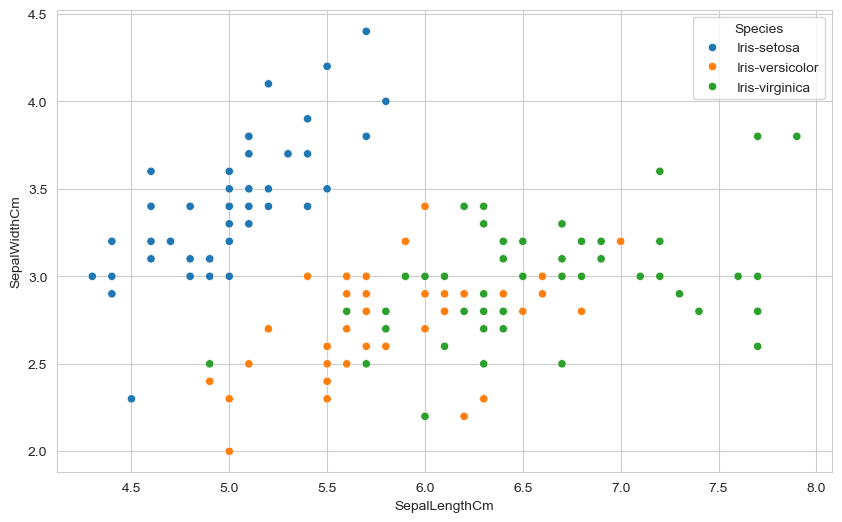

In [10]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", data=df, hue="Species")
plt.show()

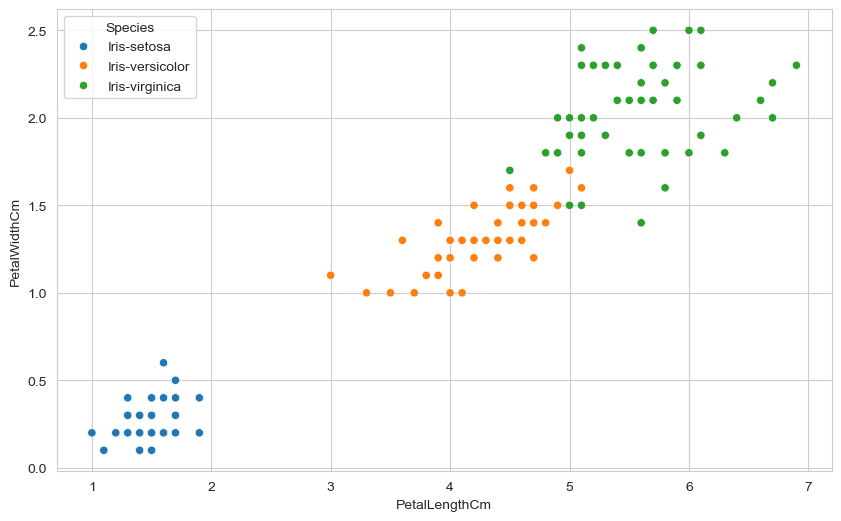

In [11]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", data=df, hue="Species")
plt.show()

In [12]:
# Datamız oldukça temiz ve bu nedenle artık Encoding, split ve Scaling gibi işlemlere başlayabiliriz.

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Species"] = encoder.fit_transform(df["Species"])
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [14]:
display(df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [15]:
df = df.drop("Id", axis=1)
print(df.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [16]:
# Datamızı LabelEncoder ile encode ettik ve Id kolonunu attık.
# Eğer Encode edilecek kolon X tarafında yani bir feature olsaydı onu train_test_split'ten sonra encode etmemiz gerekirdi.
# Çünkü amacımız tıpkı scaler'larda olduğu gibi data leakage'i önlemektir.
# Ama burada output'u encode ettiğimiz için dataseti ayırmadan encoding işlemini yapabiliriz.

# Model Building

## Naive Bayes

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop("Species", axis=1)
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [20]:
# Sürekli değerleri tahmin edeceğimiz için GaussianNB modelini naive_bayes modülünden getirdik.
# Modeli eğittik ve sonuçlarını şimdi inceleyelim:
# Datamız çok temiz olduğu için doğruluk skorumuz 1 geldi.
# Yani modelimiz datayı çok iyi anladı ve test verisinde de oldukça iyi performans verdi.
# Eğer bu tarz belli ve görselleştirme ile anlaşılabilecek datasetler varsa Naive Bayes kullanılabilir.
# Hem çok hızlı sonuç verir hem de çok iyi öğrenir ve açıklar.
# Ayrıca softmax sayesinde otomatik olarak multi-class verilerde eğitilebilir.

In [21]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(estimator=GaussianNB())
ovr.fit(X_train_scaled, y_train)
y_pred1 = ovr.predict(X_test_scaled)
print("Accuracy Score: ", accuracy_score(y_test, y_pred1))
print("Classification Report: \n", classification_report(y_test, y_pred1))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred1))

Accuracy Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [22]:
# Biz burada modelin ROC ve AUC gibi metriklerini incelemek için manuel olarak modellerimizi eğiteceğiz.
# Çünkü ROC ve AUC gibi değerler pozitif-negatif, 1-0 gibi sınıflar için incelenebilir.
# Bunu da ancak OneVsRest veya OneVsAll gibi classifier'larla yapabiliriz.
# Modelimizi eğittik ve sonuçlarımız az önceki ile neredeyse aynı.

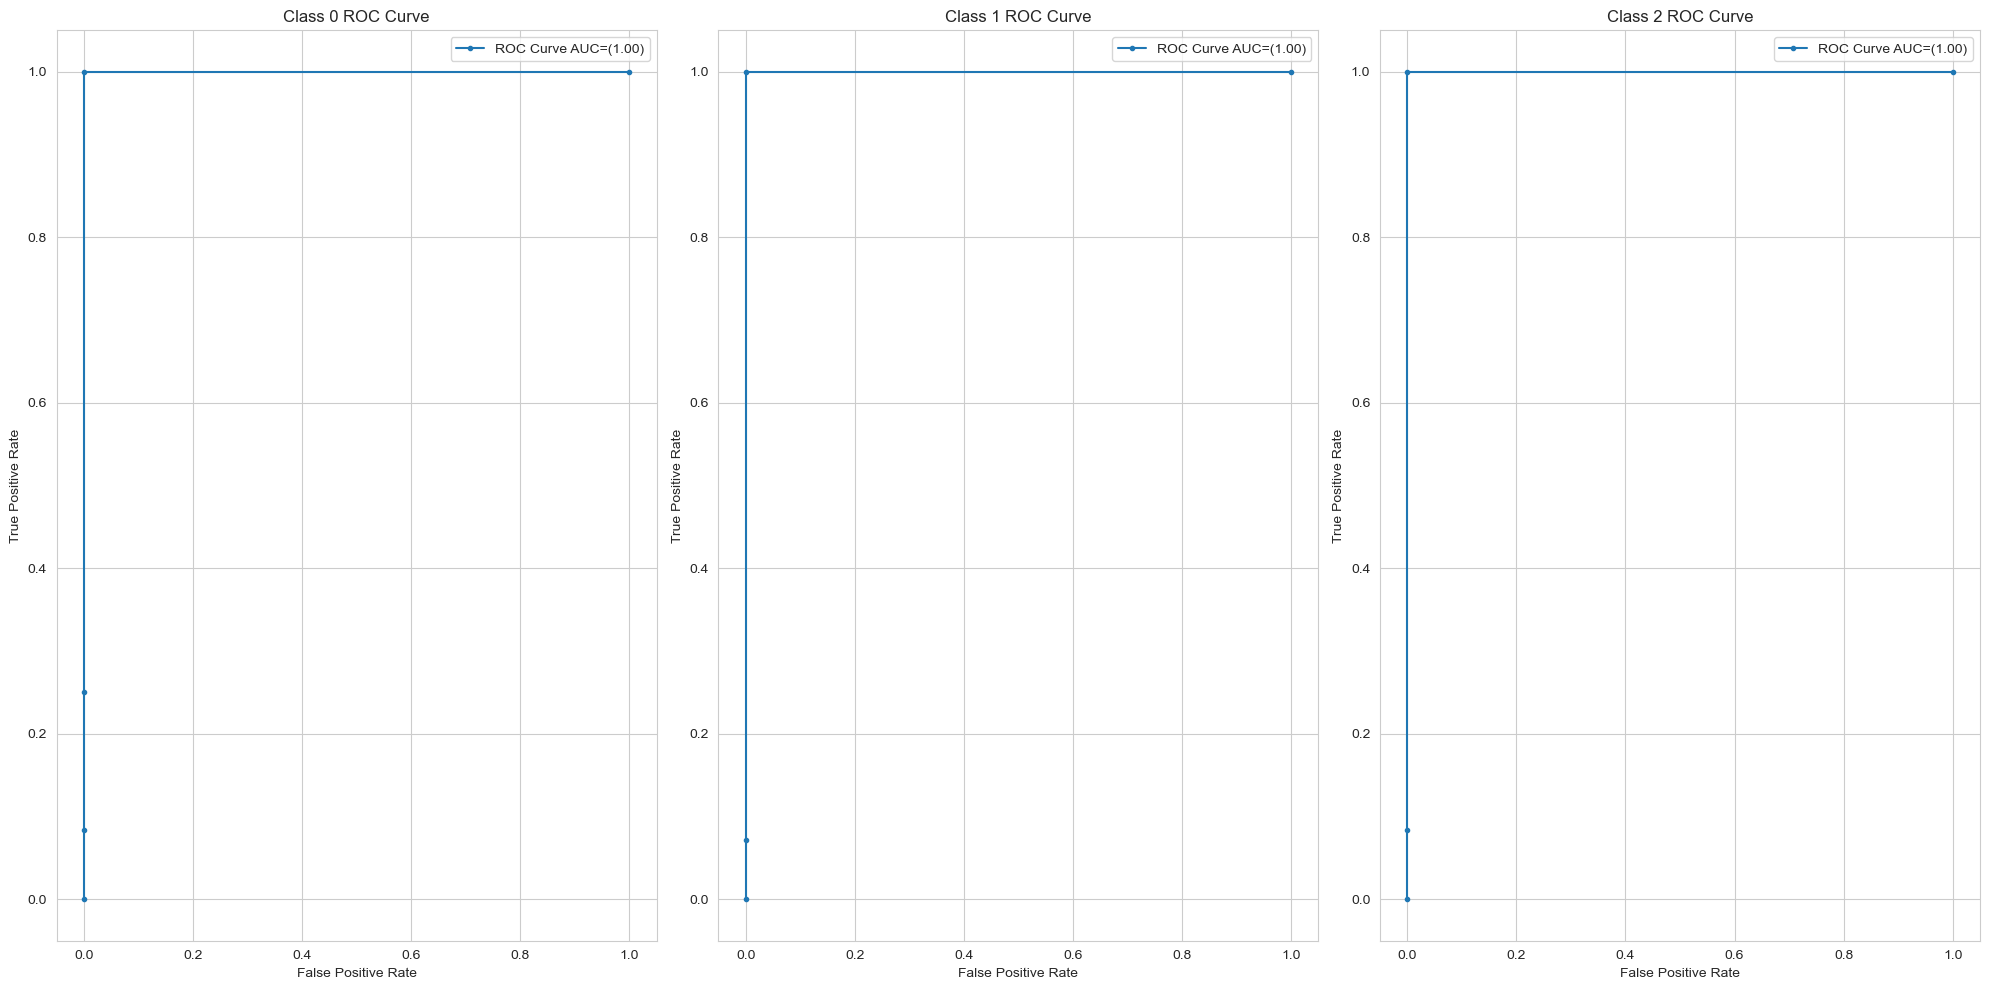

In [23]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve

y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_proba = ovr.predict_proba(X_test_scaled)

plt.figure(figsize=(20,10))
for i in range(3):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:,i], y_proba[:,i])
    roc_auc = roc_auc_score(y_test_bin[:,i], y_proba[:,i])
    plt.subplot(1,3,i+1)
    plt.plot(fpr, tpr, marker=".", label=f"ROC Curve AUC=({roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Class {i} ROC Curve")
    plt.legend()

plt.tight_layout()
plt.show()

In [24]:
# Eğrilerimizi çizerken önce label_binarize ile y_test verisini binarize ettik.
# Çünkü OvR kullandık ve her bir sınıfı diğerlerinden ayıran modellerimiz var.
# Ve her sınıf için o sınıfa ait olma ve olmama durumunun olduğu bir y_test verisi elde etmemiz lazım.
# Daha sonra hangi sınıfa ait olma olasılığını inceliyorsak o sınıfı [:,i] ile alabiliriz.
# parametre olarak önce y'test'i, daha sonra sınıfların sıralanışını veririz.
# Daha sonra tüm olasılıkları alır, for döngüsü ile bizim 3 sınıfımız için hepsini ayrı ayrı olarak alırız.
# Ve böylece AUC skorlarını ve ROC eğrilerini for döngüsü ile çizdirmiş oluruz.
# Ve gördüğümüz üzere her sınıfı diğerlerinden ayırma becerisi neredeyse 1.
# Bu çok kaliteli bir model eğitmişiz demektir.

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(estimator=LogisticRegression())
ovo.fit(X_train_scaled, y_train)
y_pred2 = ovo.predict(X_test_scaled)
print("Accuracy Score: ", accuracy_score(y_test, y_pred2))
print("Classification Report: \n", classification_report(y_test, y_pred2))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred2))

Accuracy Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [26]:
ovr2 = OneVsRestClassifier(estimator=LogisticRegression())
ovr2.fit(X_train_scaled, y_train)
y_pred3 = ovr2.predict(X_test_scaled)
print("Accuracy Score: ", accuracy_score(y_test, y_pred3))
print("Classification Report: \n", classification_report(y_test, y_pred3))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred3))

Accuracy Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


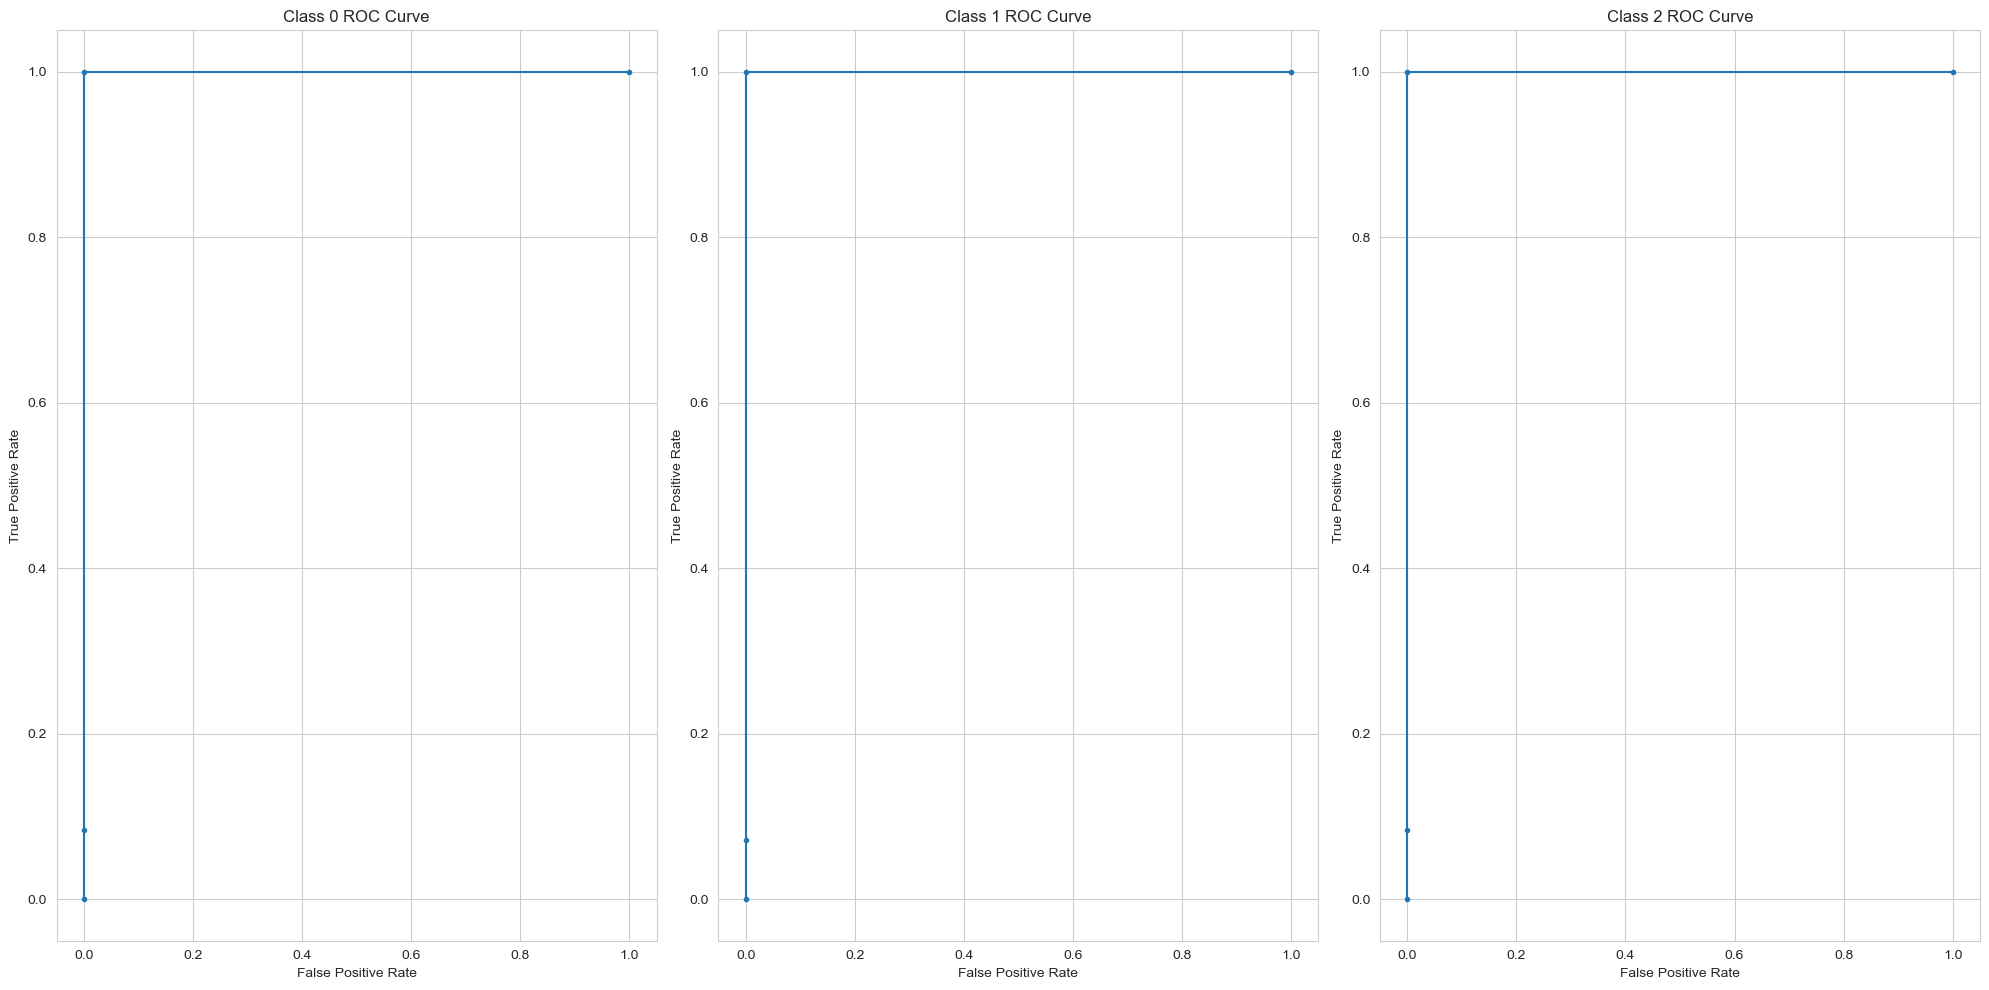

In [27]:
y_test_bin2 = label_binarize(y_test, classes=[0,1,2])
y_proba2 = ovr2.predict_proba(X_test_scaled)

plt.figure(figsize=(20,10))
for i in range(3):
    fpr, tpr, thresholds = roc_curve(y_test_bin2[:,i], y_proba2[:,i])
    auc_score = roc_auc_score(y_test_bin2[:,i], y_proba2[:,i])
    plt.subplot(1,3,i+1)
    plt.plot(fpr, tpr, marker=".", label=f"ROC Curve AUC=({auc_score:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Class {i} ROC Curve")

plt.tight_layout()
plt.show()

## SVC 

In [28]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train_scaled, y_train)
y_pred3 = svc.predict(X_test_scaled)
print("Accuracy Score: ", accuracy_score(y_test, y_pred3))
print("Classification Report: \n", classification_report(y_test, y_pred3))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred3))

Accuracy Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [29]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf")
svc.fit(X_train_scaled, y_train)
y_pred4 = svc.predict(X_test_scaled)
print("Accuracy Score: ", accuracy_score(y_test, y_pred4))
print("Classification Report: \n", classification_report(y_test, y_pred4))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred4))

Accuracy Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [30]:
ovr_svc = OneVsRestClassifier(estimator=SVC(probability=True, kernel="rbf"))
ovr_svc.fit(X_train_scaled, y_train)
y_pred5 = ovr_svc.predict(X_test_scaled)
print("Accuracy Score: ", accuracy_score(y_test, y_pred5))
print("Classification Report: \n", classification_report(y_test, y_pred5))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred5))

Accuracy Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


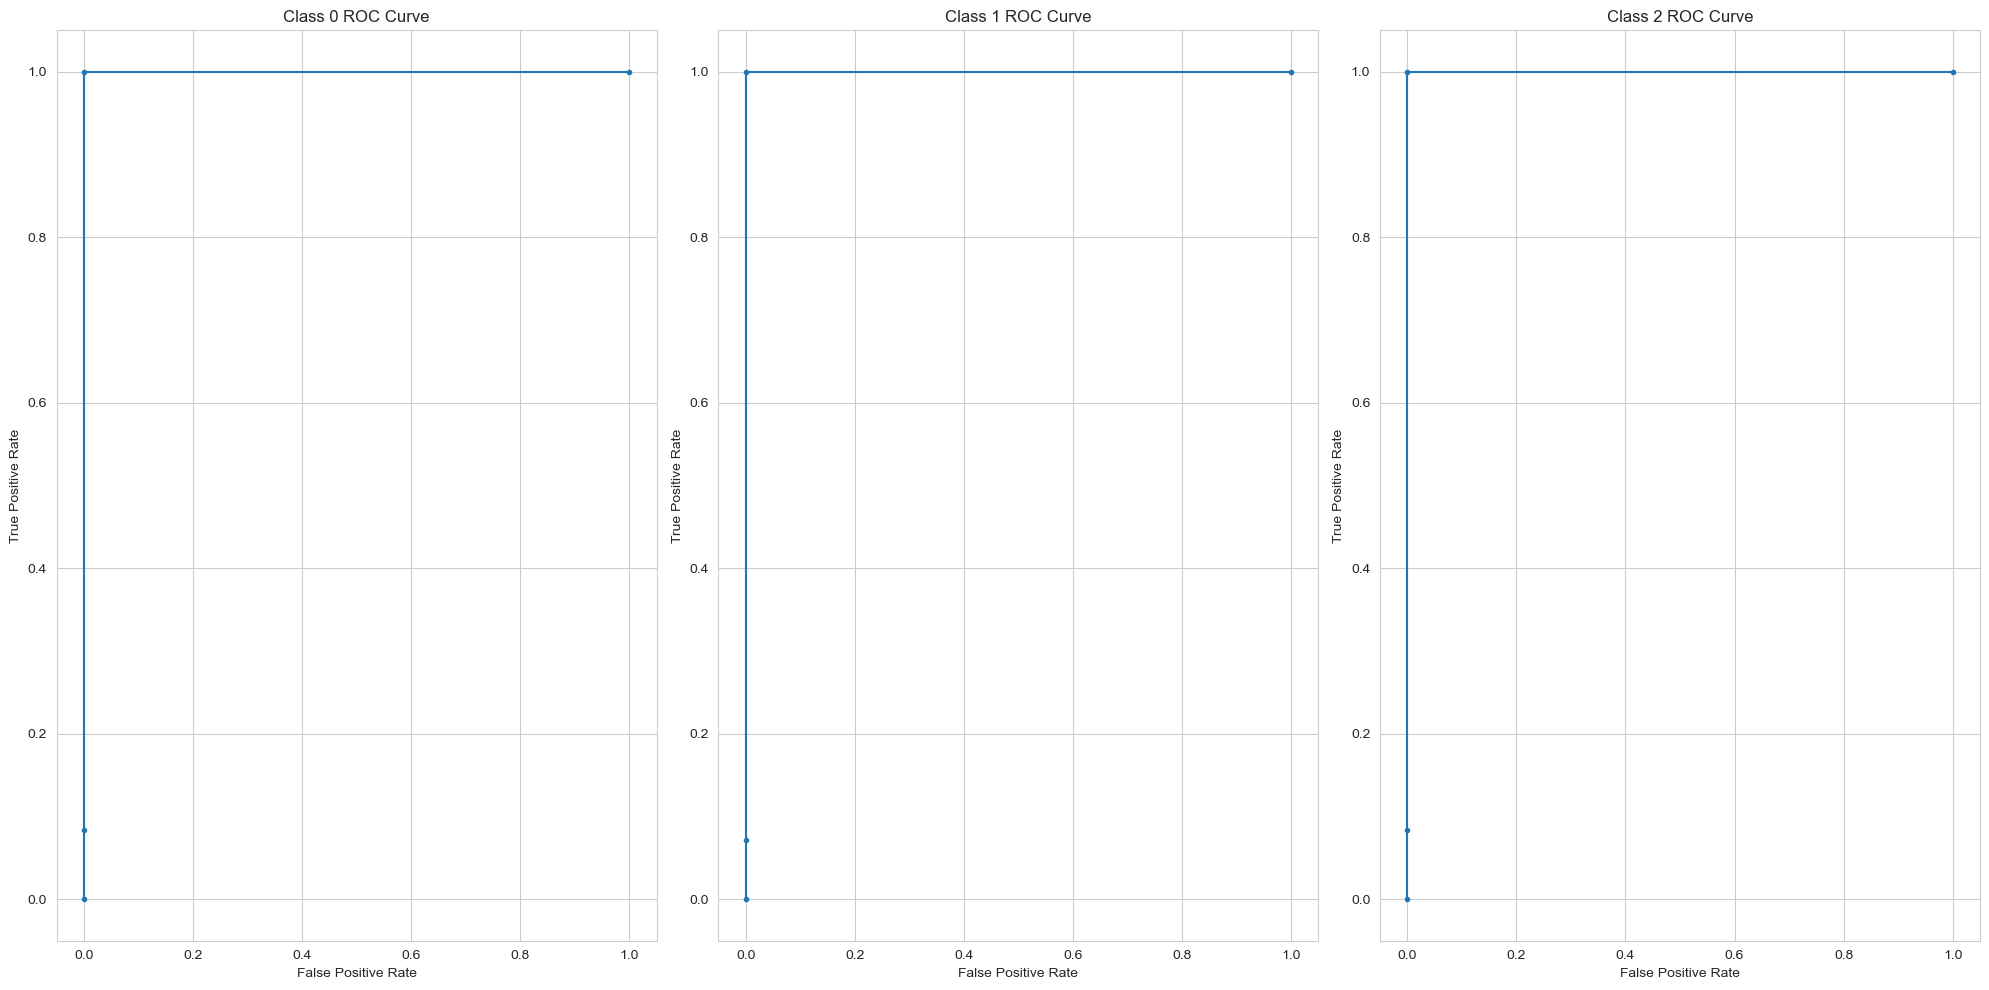

In [31]:
y_test_bin3 = label_binarize(y_test, classes=[0,1,2])
y_proba3 = ovr_svc.predict_proba(X_test_scaled)

plt.figure(figsize=(20,10))
for i in range(3):
    fpr, tpr, thresholds = roc_curve(y_test_bin3[:,i], y_proba3[:,i])
    auc_score = roc_auc_score(y_test_bin3[:,i], y_proba3[:,i])
    plt.subplot(1,3,i+1)
    plt.plot(fpr, tpr, marker=".", label=f"ROC Curve AUC=({auc_score:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Class {i} ROC Curve")

plt.tight_layout()
plt.show()

In [32]:
# We've tried Naive Bayes, Logistic Regression and SVC algorithms.
# We got 1 accuracy and 1 AUC Score from all of them.